## Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error as mae
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('autos_new.csv')
# df.head(n=10)
df

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335106,2016-03-14,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,39576,2016-04-06
335107,2016-03-05,Smart_smart_leistungssteigerung_100ps,1199,convertible,2000,automatik,101,fortwo,125000,3,gasoline,smart,nein,2016-03-05,26135,2016-03-11
335108,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
335109,2016-03-20,VW_Golf_Kombi_1_9l_TDI,3400,station wagon,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,40764,2016-03-24


## Data Preprocessing

In [3]:
col=df.columns
print(type(col))

<class 'pandas.core.indexes.base.Index'>


In [4]:
# drop_col=['date_crawled','name']
df.drop(['date_crawled','name','ad_created','last_seen_online','postal_code',],axis=1,inplace=True)
df.head()

,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage
0,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja
1,9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
2,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein
3,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
4,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja


In [5]:
df.describe()

,dollar_price,registration_year,power_ps,kilometer,registration_month
count,335111.000000,335111.000000,335111.000000,335111.000000,335111.000000
mean,6291.242606,2003.733148,120.694191,125235.354853,5.924986
std,8608.259613,7.272514,190.797297,39612.753443,3.631074
min,500.000000,1945.000000,0.000000,5000.000000,0.000000
25%,1500.000000,2000.000000,75.000000,100000.000000,3.000000
50%,3500.000000,2004.000000,110.000000,150000.000000,6.000000
75%,7900.000000,2008.000000,150.000000,150000.000000,9.000000
max,245000.000000,2016.000000,20000.000000,150000.000000,12.000000


In [6]:
data=np.array(df)

In [7]:
df.dropna(inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235829 entries, 2 to 335110
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   dollar_price        235829 non-null  int64 
 1   vehicle_type        235829 non-null  object
 2   registration_year   235829 non-null  int64 
 3   gearbox             235829 non-null  object
 4   power_ps            235829 non-null  int64 
 5   model               235829 non-null  object
 6   kilometer           235829 non-null  int64 
 7   registration_month  235829 non-null  int64 
 8   fuel_type           235829 non-null  object
 9   brand               235829 non-null  object
 10  unrepaired_damage   235829 non-null  object
dtypes: int64(5), object(6)
memory usage: 21.6+ MB


In [9]:
df.to_csv("autos_modified.csv")

In [10]:
df.reset_index(drop=True,inplace=True)
df.head(n=15)
# print(type(ds))

,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage
0,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein
1,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
2,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja
3,2200,convertible,2004,manuell,109,2_reihe,150000,8,gasoline,peugeot,nein
4,2000,limousine,2004,manuell,105,3_reihe,150000,12,gasoline,mazda,nein
5,2799,station wagon,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja
6,1750,small car,2004,automatik,75,twingo,150000,2,gasoline,renault,nein
7,7550,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein
8,1850,bus,2004,manuell,102,a_klasse,150000,1,gasoline,mercedes_benz,nein
9,10400,coupé,2009,manuell,160,scirocco,100000,4,gasoline,volkswagen,nein


In [11]:
len(pd.unique(df['fuel_type']))

5

In [12]:
from sklearn.preprocessing import MinMaxScaler
# df['dollar_price'] = MinMaxScaler().fit_transform(np.array(df['dollar_price']).reshape(-1,1))
df['kilometer'] = MinMaxScaler().fit_transform(np.array(df['kilometer']).reshape(-1,1))
df['registration_month'] = MinMaxScaler().fit_transform(np.array(df['registration_month']).reshape(-1,1))
df['registration_year'] = MinMaxScaler().fit_transform(np.array(df['registration_year']).reshape(-1,1))
df['power_ps'] = MinMaxScaler().fit_transform(np.array(df['power_ps']).reshape(-1,1))

df

,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage
0,1500,small car,0.782609,manuell,0.00375,golf,1.000000,0.500000,gasoline,volkswagen,nein
1,3600,small car,0.884058,manuell,0.00345,fabia,0.586207,0.583333,diesel,skoda,nein
2,650,limousine,0.695652,manuell,0.00510,3er,1.000000,0.833333,gasoline,bmw,ja
3,2200,convertible,0.826087,manuell,0.00545,2_reihe,1.000000,0.666667,gasoline,peugeot,nein
4,2000,limousine,0.826087,manuell,0.00525,3_reihe,1.000000,1.000000,gasoline,mazda,nein
...,...,...,...,...,...,...,...,...,...,...,...
235824,3200,limousine,0.826087,manuell,0.01125,leon,1.000000,0.416667,gasoline,seat,ja
235825,1150,bus,0.768116,manuell,0.00000,zafira,1.000000,0.250000,gasoline,opel,nein
235826,1199,convertible,0.768116,automatik,0.00505,fortwo,0.827586,0.250000,gasoline,smart,nein
235827,9200,bus,0.710145,manuell,0.00510,transporter,1.000000,0.250000,diesel,volkswagen,nein


{'whiskers': [<matplotlib.lines.Line2D at 0x210c09b8490>,
 'caps': [<matplotlib.lines.Line2D at 0x210c09b8af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210c09b8160>],
 'medians': [<matplotlib.lines.Line2D at 0x210c09c5250>],
 'fliers': [<matplotlib.lines.Line2D at 0x210c09c55e0>],
 'means': []}

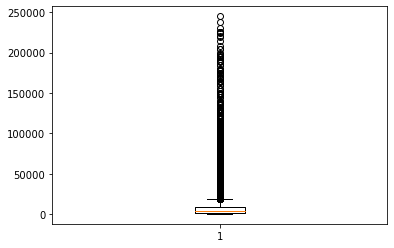

In [13]:
plt.boxplot(df.dollar_price)

In [14]:
q1 = df.quantile(q=0.25, axis=0, numeric_only=True)
q3 = df.quantile(q=0.75, axis=0, numeric_only=True)
outliers=list((df.loc[df.dollar_price>q3.dollar_price+1.5*(q3.dollar_price-q1.dollar_price)]).sort_values(by=["dollar_price"], ascending=False).index)

In [15]:
df3 = df.copy()

In [16]:
df.drop(outliers, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x210c0cd19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x210c0ce1100>,
 'boxes': [<matplotlib.lines.Line2D at 0x210c0cd1610>],
 'medians': [<matplotlib.lines.Line2D at 0x210c0ce1820>],
 'fliers': [<matplotlib.lines.Line2D at 0x210c0ce1bb0>],
 'means': []}

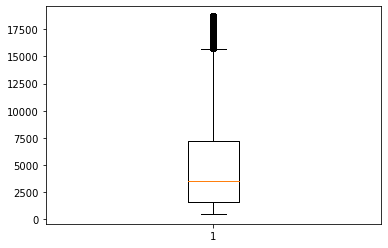

In [17]:
plt.boxplot(df.dollar_price)

In [18]:
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
df= np.array(df)
#Applies transformation on each columns
df[:,1] = le.fit_transform(df[:,1])
df[:,5] = le.fit_transform(df[:,5])
df[:,9] = le.fit_transform(df[:,9])

# onehotencoder = OneHotEncoder(categories=[1,3,8,10])
ct = ColumnTransformer(transformers = [('encode',OneHotEncoder(),[1])],remainder = 'passthrough')
df = ct.fit_transform(df)
df[:,9] = le.fit_transform(df[:,9])
ct = ColumnTransformer(transformers = [('encode',OneHotEncoder(),[9])],remainder = 'passthrough')
df = ct.fit_transform(df)
df[:,15] = le.fit_transform(df[:,15])
ct = ColumnTransformer(transformers = [('encode',OneHotEncoder(),[15])],remainder = 'passthrough')
df = ct.fit_transform(df)
df[:,21] = le.fit_transform(df[:,21])
ct = ColumnTransformer(transformers = [('encode',OneHotEncoder(),[21])],remainder = 'passthrough')
df = ct.fit_transform(df)
df

array([[0.0, 1.0, 0.0, ..., 1.0, 0.5, 37],
       [0.0, 1.0, 0.0, ..., 0.5862068965517242, 0.5833333333333333, 31],
       [1.0, 0.0, 0.0, ..., 1.0, 0.8333333333333333, 2],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 0.25, 24],
       [0.0, 1.0, 0.0, ..., 0.8275862068965517, 0.25, 32],
       [0.0, 1.0, 0.0, ..., 1.0, 0.25, 37]], dtype=object)

In [19]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1500,0.782609,0.00375,113,1.0,0.5,37
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,3600,0.884058,0.00345,99,0.586207,0.583333,31
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,650,0.695652,0.0051,11,1.0,0.833333,2
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2200,0.826087,0.00545,8,1.0,0.666667,25
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2000,0.826087,0.00525,10,1.0,1.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220487,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,3999,0.84058,0.00015,11,1.0,0.416667,2
220488,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3200,0.826087,0.01125,136,1.0,0.416667,30
220489,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1150,0.768116,0.0,238,1.0,0.25,24
220490,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1199,0.768116,0.00505,104,0.827586,0.25,32


In [20]:
df.drop([19],axis=1,inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,20,21,22
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1500,0.782609,0.00375,1.0,0.5,37
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,3600,0.884058,0.00345,0.586207,0.583333,31
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,650,0.695652,0.0051,1.0,0.833333,2
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2200,0.826087,0.00545,1.0,0.666667,25
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2000,0.826087,0.00525,1.0,1.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220487,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3999,0.84058,0.00015,1.0,0.416667,2
220488,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,3200,0.826087,0.01125,1.0,0.416667,30
220489,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1150,0.768116,0.0,1.0,0.25,24
220490,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1199,0.768116,0.00505,0.827586,0.25,32


In [21]:
import torch

In [22]:
X = np.array(df.iloc[:, 1:])
Y = np.array(df.iloc[:, 16])
X = X.astype("float32")
Y = Y.astype("float32")
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.5       , 37.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.5862069 ,
         0.5833333 , 31.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.8333333 ,  2.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.25      , 24.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.82758623,
         0.25      , 32.        ],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
         0.25      , 37.        ]], dtype=float32)

In [23]:
from sklearn.model_selection import train_test_split
train_x, X_test, train_y, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
train_x_tr=torch.from_numpy(train_x)
train_y_tr=torch.from_numpy(train_y)
test_x_tr = torch.from_numpy(X_test)
test_y_tr = torch.from_numpy(y_test)
train_x_tr

tensor([[ 1.0000,  0.0000,  1.0000,  ...,  1.0000,  0.3333, 10.0000],
        [ 1.0000,  0.0000,  0.0000,  ...,  1.0000,  1.0000, 37.0000],
        [ 1.0000,  0.0000,  1.0000,  ...,  1.0000,  0.5833, 37.0000],
        ...,
        [ 1.0000,  0.0000,  1.0000,  ...,  1.0000,  0.2500, 10.0000],
        [ 1.0000,  0.0000,  1.0000,  ...,  0.6552,  1.0000, 10.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  1.0000,  1.0000,  2.0000]])

In [24]:
train_x_tr.shape

torch.Size([147729, 21])

## Defining Model and making predictions

In [25]:
lossl = []

In [26]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()


        self.net = torch.nn.Sequential(
        torch.nn.Linear(21, 3),   # Multioutput linear regression
        

        )

    def forward(self,x):
        return self.net(x)
    
modelA = MyModel()
modelA = modelA

optimizer = torch.optim.Adam(params=modelA.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
def criterion(input, target):
    ## Other Losses
    # Normal loss
    #loss = (((input[0] - target)/torch.exp(input[1]))**2+input[1]).mean()
    # Laplace loss
    #loss = (torch.abs((input[0] - target)/torch.exp(input[1]))+input[1]).mean()
    # t-distribution loss
    #nu = 3
    #loss = ((nu + 1)/2*torch.log(1+((input[0] - target)/torch.exp(input[1]))**2/nu)+input[1]).mean()
    # print(input, target)

    ## Quanile Loss
    q1 = 0.20
    q2 = 0.5
    q3 = 0.80
    

    ## Keras quantile loss, https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/    
    #e = y_p-y    
    #return tf.keras.backend.mean(tf.keras.backend.maximum(q*e, (q-1)*e))

    ## Quantile Loss
    ## for q1, q2, q3
    #print(input.shape)
    #print(input[:,0:1].shape)
#     print(yqs.shape)
    e1 = input[:, 0] - target # !!! if input[:,0]  -> shape = (1000,)
    e2 = input[:, 1] - target
    e3 = input[:, 2] - target
    eq1 = torch.max(q1*e1, (q1-1)*e1)
    eq2 = torch.max(q2*e2, (q2-1)*e2)
    eq3 = torch.max(q3*e3, (q3-1)*e3)
    
#     eq1 = torch.max(0.05*e1, (0.05-1)*e1)
#     eq2 = torch.max(0.5*e2, (0.5-1)*e2)
#     eq3 = torch.max(0.95*e3, (0.95-1)*e3)
    loss = (eq1 + eq2 + eq3).mean()

    return loss
    

for step in range(5000):
    #yq1, yq2, yq3 = model(x)
    #loss = criterion(input=(yq1, yq2, yq3), target=y)
    yqs = modelA(train_x_tr)
    loss = criterion(input=yqs, target =train_y_tr)
    lossl.append(loss)
    #print(yqs.shape, train_y_tr.shape)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (step+1) % 1000 == 0:
        """
        Show your intermediate results
        """
        print('epoch {} loss={:.4}'.format(step+1, loss.data.item()))
        pass
    if (step+1)%500 == 0:
        scheduler.step()

epoch 1000 loss=13.84
epoch 2000 loss=10.75
epoch 3000 loss=1.204
epoch 4000 loss=0.4697
epoch 5000 loss=0.06632


In [27]:
y_pred = modelA(test_x_tr) #Predicting

In [28]:
y_pred

tensor([[ 1699.0186,  1699.0873,  1699.0292],
        [11499.9941, 11500.1387, 11499.9434],
        [11750.1504, 11750.2158, 11750.0703],
        ...,
        [17549.9199, 17550.2715, 17549.9551],
        [  999.0038,   999.0892,   999.0402],
        [ 2500.0383,  2500.1150,  2500.0422]], grad_fn=<AddmmBackward0>)

In [29]:
test_y_tr

tensor([ 1699., 11500., 11750.,  ..., 17550.,   999.,  2500.])

In [30]:
y_pred_array = np.array(test_y_tr)
y_pred_array

array([ 1699., 11500., 11750., ..., 17550.,   999.,  2500.], dtype=float32)

In [31]:
predictions = y_pred.detach().cpu().numpy()
predictions

array([[ 1699.0186 ,  1699.0873 ,  1699.0292 ],
       [11499.994  , 11500.139  , 11499.943  ],
       [11750.15   , 11750.216  , 11750.07   ],
       ...,
       [17549.92   , 17550.271  , 17549.955  ],
       [  999.0038 ,   999.08923,   999.0402 ],
       [ 2500.0383 ,  2500.115  ,  2500.0422 ]], dtype=float32)

In [32]:
predictions_mean = predictions[:, 1]

In [33]:
predictions_mean

array([ 1699.0873 , 11500.139  , 11750.216  , ..., 17550.271  ,
         999.08923,  2500.115  ], dtype=float32)

In [34]:
y_pred_array

array([ 1699., 11500., 11750., ..., 17550.,   999.,  2500.], dtype=float32)

In [35]:
lossl = [x.detach().cpu().numpy() for x in lossl]

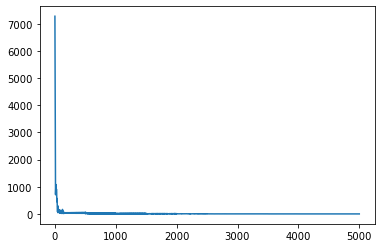

In [36]:
lossl = np.array(lossl)
ind = [i for i in range(1, lossl.shape[0]+1)]
plt.plot(ind, lossl)

## Checking validity of predictions

In [37]:
param_list = []
for params in modelA.parameters():
    param_list.append(list(params.detach().numpy()))

In [38]:
coeff_upper = (param_list[0][0]).reshape((len(param_list[0][0]), 1))
coeff_lower = param_list[0][2].reshape((len(param_list[0][0]), 1))
coeff_ = param_list[0][1].reshape((len(param_list[0][0]), 1))

In [39]:
coeff_upper.shape

(21, 1)

### Evaluating the Model

In [40]:
mae(predictions_mean, y_test) #Model Performance

0.094105534

In [42]:
ridge = Ridge()  # Evaluating against a ridge regressor
ridge = ridge.fit(train_x, train_y)
ridge_preds = ridge.predict(X_test)
mae(y_test, ridge_preds)

C:\Users\hp-u\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.61772e-13): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.23347326